In [1]:
num_neurons = 3

neuron_spiked = [0]*num_neurons

neuron_values = [0]*num_neuron

In [4]:
connections = [
    [0, 1, 1],
    [1, 0, 0],
    [0, 1, 0]
]

In [5]:
for i in range(num_neurons):
    if neuron_spiked[i]:   

[0, 1, 0]

In [ ]:
def Is(spikes,prev_Is):
    new_Is=prev_Is*decay_constant # for example decay_constant = 0.99
    if spikes>0:
        new_Is=new_Is+spikes*jump_constant # for example jump_constant = 0.1
    return new_Is

### Global Computation Using TF Sparse Multiplication

### https://www.tensorflow.org/api_docs/python/tf/sparse_tensor_dense_matmul

In [106]:
import tensorflow as tf
import numpy as np
import numpy.polynomial.polynomial as poly

from random import randint

import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
tf.reset_default_graph()
num_neurons = 5000

In [85]:
indices = []
values = []
for i in range(num_neurons):
    for j in range(num_neurons):
        x  = 3
        if i != j:
            number = randint(0, 99)
            if number < 5:
                indices.append([i, j])
                values.append(1.0/5)
                
connections = tf.SparseTensor(indices=indices, values=values, dense_shape=[num_neurons, num_neurons])

In [86]:
neuron_values = tf.Variable(np.ones(num_neurons), dtype=tf.float32)

In [87]:
mul_product = tf.sparse_tensor_dense_matmul(connections, tf.reshape(neuron_values, shape=(num_neurons, 1)))

In [99]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [100]:
%%time
output = sess.run(mul_product)

CPU times: user 37.3 ms, sys: 16.7 ms, total: 54 ms
Wall time: 52.7 ms


In [121]:
x_sparse_matmul = [10, 100, 1000, 2000, 3000, 4000, 5000, 10000]
y_sparse_matmul = [1.02, 1.14, 3.35, 9.34, 18.6, 35.8, 52.9, 258]

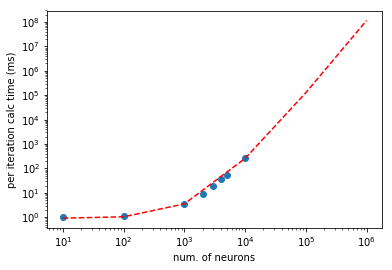

In [21]:
fig = plt.figure()

plt.xscale('log')
plt.yscale('log')

ax1 = fig.add_subplot(111)
ax1.scatter(x_sparse_matmul, y_sparse_matmul)

ax1.set_xlabel('num. of neurons')
ax1.set_ylabel('per iteration calc time (ms)')

coefs = poly.polyfit(x_sparse_matmul, y_sparse_matmul, 3)
x_new = [10, 100, 1000, 10000, 100000, 1000000]
ffit = poly.polyval(x_new, coefs)
plt.plot(x_new, ffit, 'r--')

plt.draw()